In [1]:
import keras

In [2]:
import pandas as pd
import numpy as np
from numpy import array

import matplotlib.pyplot as plt

In [3]:
def dnaOneHot(sequence):
    seq_array = array(list(sequence))
    code = {"A": [0], "C": [1], "G": [2], "T": [3], "N": [4],
            "a": [0], "c": [1], "g": [2], "t": [3], "n": [4]}
    onehot_encoded_seq = []
    for char in seq_array:
        onehot_encoded = np.zeros(5)
        onehot_encoded[code[char]] = 1
        onehot_encoded_seq.append(onehot_encoded[0:4])
    return onehot_encoded_seq

# First, Only Focus on ChrV:

In [4]:
genome_df_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/yeast_chrV_nucleosome_alignment_window_size200.csv")

In [5]:
genome_df_chrV

,sequence,distance_to_nucleosome,chrID,nucleosome_center,position
0,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,-200,chrV,233,8
1,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,-199,chrV,233,9
2,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,-198,chrV,233,10
3,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,-197,chrV,233,11
4,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,-196,chrV,233,12
...,...,...,...,...,...
1276795,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,195,chrV,576556,576726
1276796,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,196,chrV,576556,576727
1276797,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,197,chrV,576556,576728
1276798,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,198,chrV,576556,576729


In [6]:
# X_chrV = []
# for sequence_nt in genome_df_chrV["sequence"]:
#     X_chrV.append(dnaOneHot(sequence_nt))
# X_chrV = array(X_chrV)
# X_chrV = X_chrV.reshape((X_chrV.shape[0],50,4,1))

### Get Mean/Stdev of provided ChrV C0:

In [7]:
# cycle6 = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/cycle6.txt")

In [8]:
# cycle6_mean = cycle6.C0.mean()
# cycle6_std = cycle6.C0.std()

In [9]:
# cycle6_c26_mean = cycle6["n=26"].mean()
# cycle6_c26_std = cycle6["n=26"].std()
# cycle6_c29_mean = cycle6["n=29"].mean()
# cycle6_c29_std = cycle6["n=29"].std()
# cycle6_c31_mean = cycle6["n=31"].mean()
# cycle6_c31_std = cycle6["n=31"].std()

In [10]:
normal_mean = -0.18574825868055558
normal_std = 0.4879013326394626

### DNAcycP:

In [17]:
# DNAcycP_pred_chrV_norm = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrv_aligned_cycle_norm_DNAcycP.txt", header=None)
# DNAcycP_pred_chrV_norm = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrv_aligned_cycle_unnorm_DNAcycP.txt", header=None)
DNAcycP_pred_chrV_norm = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrV_1bpres_DNAcycP_cycle_norm.txt", header=None)

In [18]:
genome_df_chrV_aligned = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/yeast_chrV_nucleosome_alignment_window_size200.csv")
genome_df_chrV_aligned = genome_df_chrV_aligned.loc[(genome_df_chrV_aligned["position"] >= 0) & (genome_df_chrV_aligned["position"] < genome_df_chrV.shape[0])]
genome_df_chrV_positions = genome_df_chrV_aligned["position"]
genome_df_chrV_positions = genome_df_chrV_positions[genome_df_chrV_positions >= 0]
genome_df_chrV_positions = genome_df_chrV_positions[genome_df_chrV_positions < genome_df_chrV.shape[0]]
DNAcycP_pred_chrV_norm = DNAcycP_pred_chrV_norm.loc[genome_df_chrV_positions, 0].values

In [19]:
DNAcycP_pred_chrV_norm

array([-0.31434944, -0.4273306 , -0.43884045, ..., -0.43884045,
       -0.4273306 , -0.31434944])

In [20]:
DNAcycP_pred_chrV = DNAcycP_pred_chrV_norm
# DNAcycP_pred_chrV = DNAcycP_pred_chrV_norm*cycle6_std + cycle6_mean

In [21]:
DNAcycP_pred_chrV_mean = DNAcycP_pred_chrV.mean()
DNAcycP_pred_chrV_std = DNAcycP_pred_chrV.std()
DNAcycP_pred_chrV = (DNAcycP_pred_chrV-DNAcycP_pred_chrV_mean)/DNAcycP_pred_chrV_std

In [22]:
DNAcycP_pred_chrV = array(DNAcycP_pred_chrV)

In [23]:
genome_df_chrV["DNAcycP_pred_chrV"] = DNAcycP_pred_chrV

### CycPred:

In [24]:
CycPred_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/cycpred_chrv_aligned.txt", header=None)

In [25]:
CycPred_pred_chrV_mean = CycPred_pred_chrV.mean()
CycPred_pred_chrV_std = CycPred_pred_chrV.std()
CycPred_pred_chrV = (CycPred_pred_chrV-CycPred_pred_chrV_mean)/CycPred_pred_chrV_std
# CycPred_pred_chrV = (CycPred_pred_chrV-normal_mean)/normal_std

In [26]:
CycPred_pred_chrV = array(CycPred_pred_chrV)

In [27]:
genome_df_chrV["CycPred_pred_chrV"] = CycPred_pred_chrV

### DeepBend:

In [28]:
DeepBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/deepbend_chrv_aligned.txt", header=None)

In [29]:
DeepBend_pred_chrV_mean = DeepBend_pred_chrV.mean()
DeepBend_pred_chrV_std = DeepBend_pred_chrV.std()
DeepBend_pred_chrV = (DeepBend_pred_chrV-DeepBend_pred_chrV_mean)/DeepBend_pred_chrV_std
# DeepBend_pred_chrV = (DeepBend_pred_chrV-normal_mean)/normal_std

In [30]:
DeepBend_pred_chrV = array(DeepBend_pred_chrV)

In [31]:
genome_df_chrV["DeepBend_pred_chrV"] = DeepBend_pred_chrV

### MIXBend:

In [32]:
MIXBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/mixbend_chrv_aligned.txt")

In [33]:
MIXBend_pred_chrV_mean = MIXBend_pred_chrV.mean()
MIXBend_pred_chrV_std = MIXBend_pred_chrV.std()
MIXBend_pred_chrV = (MIXBend_pred_chrV-MIXBend_pred_chrV_mean)/MIXBend_pred_chrV_std
# MIXBend_pred_chrV = (MIXBend_pred_chrV-normal_mean)/normal_std

In [34]:
MIXBend_pred_chrV = array(MIXBend_pred_chrV)

In [35]:
genome_df_chrV["MIXBend_pred_chrV"] = MIXBend_pred_chrV

In [36]:
def find_c0(dat, aa):
  mat = np.empty((3,3), float)
  k = 2*np.pi/10.4
  n = array([26, 29, 31])
  mat[0:3, 0] = 1
  mat[0:3, 1] = np.sin(n*k)
  mat[0:3, 2] = np.cos(n*k)
  mat[0, 1:3] = mat[0, 1:3]*aa[0]
  mat[1, 1:3] = mat[1, 1:3]*aa[1]
  mat[2, 1:3] = mat[2, 1:3]*aa[2]
  inv_mat = np.linalg.inv(mat)
  c0A1A2 = array(np.matmul(dat[["n=26", "n=29", "n=31"]], np.transpose(inv_mat))).astype(float)
  c0Aphi = c0A1A2
  c0Aphi[:,0] = c0A1A2[:,0]
  c0Aphi[:,1] = np.sqrt(c0A1A2[:,1]**2 + c0A1A2[:,2]**2)
  c0Aphi[:,2] <- np.sign(c0A1A2[:,2]) * np.arccos(c0A1A2[:,1]/c0Aphi[:,1])
  return c0Aphi[:,0]

In [37]:
aa = [1, 1/0.82, 1/0.7]
# aa = [1, 1, 1]

### Original C0, Cn Measurements:

In [38]:
# cycle6 = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/cycle6.txt",delimiter = ",")
# genome_df_chrV_everyseq = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/yeast_chrV_1bpresolution_subsequence50.csv")

In [39]:
# j=0
# everyseq_matched_pairs = []
# for i, seq in enumerate(cycle6.Sequence):
#     cur_iter = 0
#     while genome_df_chrV_everyseq.sequence[j+cur_iter] != seq:
#         cur_iter += 1
#         if cur_iter > 200:
#             break
#     if cur_iter > 200:
#         continue
#     j += cur_iter
#     everyseq_matched_pairs.append((i,j))
# # genome_df_chrV.iloc[np.where(genome_df_chrV.sequence == cycle6.Sequence[len(cycle6.Sequence)-1])[0],:]


In [40]:
# min_pos = 0
# prev_nuc_center = 0
# num_no_nuc_center = 0
# matched_pairs = []
# for i, seq in enumerate(genome_df_chrV.sequence):
#     # check if the nucleosome is still the same:
#     if genome_df_chrV.nucleosome_center[i] != prev_nuc_center:
#         num_no_nuc_center += 1
#         new_start_pos = max(min_pos - 400, 0)
#         max_iter = 1000
#         found = False
#         for j in range(new_start_pos, new_start_pos + max_iter):
#             if j >= len(cycle6.Sequence):
#                 break
#             if cycle6.Sequence[j] == seq:
#                 min_pos = j
#                 prev_nuc_center = genome_df_chrV.nucleosome_center[i]
#                 print(f"Found new nucleosome center! {i}")
#                 matched_pairs.append((i,j))
#                 num_no_nuc_center = 0
#                 found = True
#                 break
#         if found:
#             continue
#         if num_no_nuc_center % 7 == 0:
#             print(f"Couldn't find new nucleosome center: i={i}")
#     else:
#         new_start_pos = max(min_pos-1, 0)
#         max_iter = 20
#         for j in range(new_start_pos, new_start_pos + max_iter):
#             if j >= len(cycle6.Sequence):
#                 break
#             if cycle6.Sequence[j] == seq:
#                 min_pos = j
#                 matched_pairs.append((i, j))
#                 continue

#     # find position (if it  exists, which it probably doesn't) in matched_pairs that corresponds:


In [41]:
# genome_df_chrV["C0"] = np.nan
# genome_df_chrV["C26"] = np.nan
# genome_df_chrV["C29"] = np.nan
# genome_df_chrV["C31"] = np.nan

In [42]:
# for (i, j) in matched_pairs:
#     if genome_df_chrV["sequence"].iloc[i] != cycle6["Sequence"].iloc[j]:
#         print("Error!")
#         break
#     genome_df_chrV["C0"].iloc[i] = cycle6["C0"].iloc[j]
#     genome_df_chrV["C26"].iloc[i] = cycle6["n=26"].iloc[j]
#     genome_df_chrV["C29"].iloc[i] = cycle6["n=29"].iloc[j]
#     genome_df_chrV["C31"].iloc[i] = cycle6["n=31"].iloc[j]

In [43]:
# genome_df_chrV["C0_norm"] = (genome_df_chrV["C0"] - genome_df_chrV["C0"].mean())/genome_df_chrV["C0"].std()
# genome_df_chrV["C26_norm"] = (genome_df_chrV["C26"] - genome_df_chrV["C26"].mean())/genome_df_chrV["C26"].std()
# genome_df_chrV["C29_norm"] = (genome_df_chrV["C29"] - genome_df_chrV["C29"].mean())/genome_df_chrV["C29"].std()
# genome_df_chrV["C31_norm"] = (genome_df_chrV["C31"] - genome_df_chrV["C31"].mean())/genome_df_chrV["C31"].std()

In [44]:
genome_df_chrV

,sequence,distance_to_nucleosome,chrID,nucleosome_center,position,DNAcycP_pred_chrV,CycPred_pred_chrV,DeepBend_pred_chrV,MIXBend_pred_chrV
0,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,-200,chrV,233,8,-0.359827,-0.363096,-0.424451,-0.453112
1,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,-199,chrV,233,9,-0.487418,-0.554903,-0.509093,-0.642149
2,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,-198,chrV,233,10,-0.500416,-0.495360,-0.529277,-0.598248
3,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,-197,chrV,233,11,-0.512471,-0.548045,-0.430238,-0.519217
4,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,-196,chrV,233,12,-0.354882,-0.432139,-0.630460,-0.609683
...,...,...,...,...,...,...,...,...,...
1276795,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,195,chrV,576556,576726,-0.354882,-0.432139,-0.630460,-0.719221
1276796,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,196,chrV,576556,576727,-0.512471,-0.548045,-0.430238,-0.679871
1276797,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,197,chrV,576556,576728,-0.500416,-0.495360,-0.529277,-0.815994
1276798,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,198,chrV,576556,576729,-0.487418,-0.554903,-0.509093,-0.656764


In [45]:
genome_df_chrV.mean(numeric_only=True)

distance_to_nucleosome   -5.000000e-01
nucleosome_center         2.877509e+05
position                  2.877254e+05
DNAcycP_pred_chrV        -2.279435e-17
CycPred_pred_chrV        -2.315052e-17
DeepBend_pred_chrV        1.567112e-17
MIXBend_pred_chrV         2.218888e-16
dtype: float64

In [46]:
genome_df_chrV.std(numeric_only=True)

distance_to_nucleosome       115.469738
nucleosome_center         167114.486122
position                  167114.526015
DNAcycP_pred_chrV              1.000000
CycPred_pred_chrV              1.000000
DeepBend_pred_chrV             1.000000
MIXBend_pred_chrV              1.000000
dtype: float64

In [47]:
genome_df_chrV_dist_nuc_grouped = genome_df_chrV.groupby("distance_to_nucleosome").mean(numeric_only=True)

In [48]:
genome_df_chrV_dist_nuc_grouped

,nucleosome_center,position,DNAcycP_pred_chrV,CycPred_pred_chrV,DeepBend_pred_chrV,MIXBend_pred_chrV
distance_to_nucleosome,,,,,,
-200,287750.876566,287525.876566,0.017887,0.018077,0.007170,0.014265
-199,287750.876566,287526.876566,0.028076,0.028791,0.024466,0.035153
-198,287750.876566,287527.876566,0.036009,0.035159,0.028496,0.037299
-197,287750.876566,287528.876566,0.031025,0.032525,0.031124,0.028284
-196,287750.876566,287529.876566,0.025784,0.023598,0.024173,0.021541
...,...,...,...,...,...,...
195,287750.876566,287920.876566,0.009830,0.012708,-0.000016,-0.000761
196,287750.876566,287921.876566,0.009879,0.011544,-0.002451,0.000956
197,287750.876566,287922.876566,0.008414,0.011141,0.001114,0.012111


In [49]:
xlims=[-200, 200]
ylims=[-0.1, 0.125]
ylims2=[-0.4, 0.35]

In [50]:
# plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["C0_norm"], label="Original C0 (normalized)", alpha=alpha_val)
# plt.vlines([-74, 73], ylims2[0], ylims2[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims2[0], ylims2[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
# plt.vlines([i*10 for i in list(range(-20, 20))], ylims2[0], ylims2[1], alpha=0.1)
# plt.legend()
# plt.xlim(xlims)
# plt.ylim(ylims2)
# plt.show()

In [51]:
# plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["C26_norm"], label="Original C26 (normalized)", alpha=alpha_val)
# plt.vlines([-74, 73], ylims2[0], ylims2[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims2[0], ylims2[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
# plt.vlines([i*10 for i in list(range(-20, 20))], ylims2[0], ylims2[1], alpha=0.1)
# plt.legend()
# plt.xlim(xlims)
# plt.ylim(ylims2)
# plt.show()

In [52]:
# plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["C29_norm"], label="Original C29 (normalized)", alpha=alpha_val)
# plt.vlines([-74, 73], ylims2[0], ylims2[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims2[0], ylims2[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
# plt.vlines([i*10 for i in list(range(-20, 20))], ylims2[0], ylims2[1], alpha=0.1)
# plt.legend()
# plt.xlim(xlims)
# plt.ylim(ylims2)
# plt.show()

In [53]:
# plt.figure(figsize=(12,7))

# plt.plot(genome_df_chrV_dist_nuc_grouped["C31_norm"], label="Original C31 (normalized)", alpha=alpha_val)
# plt.vlines([-74, 73], ylims2[0], ylims2[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims2[0], ylims2[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
# plt.vlines([i*10 for i in list(range(-20, 20))], ylims2[0], ylims2[1], alpha=0.1)
# plt.legend()
# plt.xlim(xlims)
# plt.ylim(ylims2)
# plt.show()

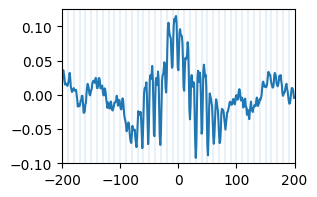

In [54]:
plt.figure(figsize=(3,2))

plt.plot(genome_df_chrV_dist_nuc_grouped["DNAcycP_pred_chrV"], label="Predicted DNAcycP")
# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)
# plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)
# plt.ylabel("Average Predicted C0")
# plt.xlabel("Position from +1 Dyad (bp)")
plt.show()

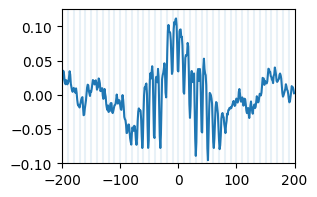

In [55]:
plt.figure(figsize=(3,2))

plt.plot(genome_df_chrV_dist_nuc_grouped["CycPred_pred_chrV"], label="Predicted CycPred")
# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)
# plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)
# plt.ylabel("Average Predicted C0")
# plt.xlabel("Position from +1 Dyad (bp)")
plt.show()

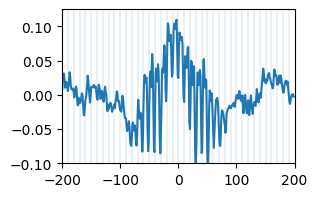

In [56]:
plt.figure(figsize=(3,2))

plt.plot(genome_df_chrV_dist_nuc_grouped["DeepBend_pred_chrV"], label="Predicted DeepBend")
# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)
# plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)
# plt.ylabel("Average Predicted C0")
# plt.xlabel("Position from +1 Dyad (bp)")
plt.show()

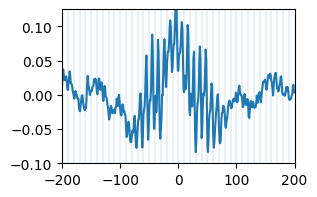

In [57]:
plt.figure(figsize=(3,2))

plt.plot(genome_df_chrV_dist_nuc_grouped["MIXBend_pred_chrV"], label="Predicted MIXBend")
# plt.vlines([-74, 73], ylims[0], ylims[1], color="red", alpha=0.2, label="Outer Nucleosome endpoints")
# plt.vlines([-49, 48], ylims[0], ylims[1], color="red", alpha=0.3, label="Inner Nucleosome endpoints")
plt.vlines([i*10 for i in list(range(-20, 20))], ylims[0], ylims[1], alpha=0.1)
# plt.legend()
plt.xlim(xlims)
plt.ylim(ylims)
# plt.ylabel("Average Predicted C0")
# plt.xlabel("Position from +1 Dyad (bp)")
plt.show()

In [128]:
genome_df_chrV

,sequence,distance_to_nucleosome,chrID,nucleosome_center,position,DNAcycP_pred_chrV,CycPred_pred_chrV,DeepBend_pred_chrV,MIXBend_pred_chrV
0,CCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTT...,-200,chrV,233,8,-0.386275,-0.363096,-0.424451,-0.453112
1,CAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTA...,-199,chrV,233,9,-0.573965,-0.554903,-0.509093,-0.642149
2,AAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTAC...,-198,chrV,233,10,-0.492815,-0.495360,-0.529277,-0.598248
3,AGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACT...,-197,chrV,233,11,-0.602573,-0.548045,-0.430238,-0.519217
4,GCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTA...,-196,chrV,233,12,-0.353106,-0.432139,-0.630460,-0.609683
...,...,...,...,...,...,...,...,...,...
1276795,AAGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACA...,195,chrV,576556,576726,-0.353106,-0.432139,-0.630460,-0.719221
1276796,AGGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAG...,196,chrV,576556,576727,-0.602573,-0.548045,-0.430238,-0.679871
1276797,GGTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGG...,197,chrV,576556,576728,-0.492815,-0.495360,-0.529277,-0.815994
1276798,GTAGTAAGTAGCTTTTGGTTGAACATCCGGGTAAGAGACAACAGGG...,198,chrV,576556,576729,-0.573965,-0.554903,-0.509093,-0.656764
